<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Небалансированная-логистическая-регрессия" data-toc-modified-id="Небалансированная-логистическая-регрессия-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Небалансированная логистическая регрессия</a></span></li><li><span><a href="#Небалансированное-дерево-решений" data-toc-modified-id="Небалансированное-дерево-решений-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Небалансированное дерево решений</a></span></li><li><span><a href="#Небалансированный-случайный-лес" data-toc-modified-id="Небалансированный-случайный-лес-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Небалансированный случайный лес</a></span></li><li><span><a href="#Небалансированный-Catboost" data-toc-modified-id="Небалансированный-Catboost-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Небалансированный Catboost</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Балансированная-логистическая-регрессия" data-toc-modified-id="Балансированная-логистическая-регрессия-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Балансированная логистическая регрессия</a></span></li><li><span><a href="#Балансированное-дерево-решений" data-toc-modified-id="Балансированное-дерево-решений-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Балансированное дерево решений</a></span></li><li><span><a href="#Балансированный-случайный-лес" data-toc-modified-id="Балансированный-случайный-лес-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Балансированный случайный лес</a></span></li><li><span><a href="#Балансированный-Catboost" data-toc-modified-id="Балансированный-Catboost-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Балансированный Catboost</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов из банка

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Задача: 1) спрогнозировать, уйдёт клиент из банка в ближайшее время или нет на основе исторических данных о поведении клиентов и расторжении договоров с банком. 

2) построить модель с предельно большим значением *F1*-меры(минимум 0.59). Проверить *F1*-меру на тестовой выборке.

3)измерить *AUC-ROC*, сравнить её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve 
import matplotlib.pyplot as plt
! pip install catboost
from catboost import CatBoostClassifier
import warnings
warnings.filterwarnings('ignore')

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
!pip install opendatasets
import opendatasets as od
od.download('https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling')

Defaulting to user installation because normal site-packages is not writeable
Skipping, found downloaded files in "./bank-customer-churn-modeling" (use force=True to force download)


In [ ]:
data = pd.read_csv('bank-customer-churn-modeling/Churn_Modelling.csv')

In [ ]:
data.sample()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9902,9903,15797665,Docherty,730,France,Female,27,7,0.0,2,1,0,144099.48,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Проверены значения методом value_count - не встречено ничего необычного. Лучше избавиться от трех лишних столбцов - номер записи присутствует в индексе, а фамилия и айди помешают кодированию.

In [ ]:
data = data.drop(['RowNumber', 'Surname', 'CustomerId'], axis = 1)

Преобразуем категориальные признаки в численные

In [ ]:
data_ohe = pd.get_dummies(data, drop_first=True)
data_ohe.sample()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
2927,632,32,6,111589.33,1,1,1,170382.99,0,0,0,1


In [ ]:
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

Присутствует дисбаланс классов

## Исследование задачи

Поделим выборку на обучающую, валидационную, и тестовую, а также отмасштабируем количественные столбцы.

In [ ]:
target = data_ohe['Exited']
features = data_ohe.drop('Exited', axis=1)
f, features_test, t, target_test = train_test_split(features, target,test_size=0.2, random_state=12345)
features_train, features_valid, target_train, target_valid = train_test_split(f,t,test_size = 0.25, random_state=12345)

numeric = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric]) 
features_test[numeric] = scaler.transform(features_test[numeric])
pd.options.mode.chained_assignment = None
features_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
492,-0.134048,-0.078068,4,0.076163,2,0,1,0.331571,0,0,0
6655,-1.010798,0.494555,7,0.136391,1,1,1,-0.727858,0,0,1
4287,0.639554,1.353490,1,0.358435,1,1,1,-0.477006,1,0,1
42,-0.990168,2.116987,2,0.651725,1,1,1,-0.100232,0,0,0
8178,0.567351,0.685430,7,0.813110,2,1,1,0.801922,0,0,0


In [ ]:
features_test.shape, target_test.shape, features_train.shape, target_train.shape, features_valid.shape, target_valid.shape

((2000, 11), (2000,), (6000, 11), (6000,), (2000, 11), (2000,))

Исследуем модели без балансировки классов

### Небалансированная логистическая регрессия 

In [ ]:
lr = LogisticRegression()
lr.fit(features_train, target_train)
predicted_valid = lr.predict(features_valid)
f1_score(target_valid, predicted_valid)


0.30393996247654786

In [ ]:
probabilities_valid = lr.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

roc_auc_score(target_valid, probabilities_one_valid)

0.7702628596497642

### Небалансированное дерево решений

In [ ]:
tree = DecisionTreeClassifier(random_state=12345)
tree.fit(features_train, target_train)
predicted_valid = tree.predict(features_valid)
f1_score(target_valid, predicted_valid)

0.49196538936959205

In [ ]:
probabilities_valid = tree.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

roc_auc_score(target_valid, probabilities_one_valid)

0.6864210109693079

### Небалансированный случайный лес

In [ ]:
forest = RandomForestClassifier(random_state=12345) 
forest.fit(features_train, target_train)
predicted_valid = forest.predict(features_valid)
f1_score(target_valid, predicted_valid)

0.536115569823435

In [ ]:
probabilities_valid = forest.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

roc_auc_score(target_valid, probabilities_one_valid)

0.8121206003951558

### Небалансированный Catboost

In [ ]:
cat = CatBoostClassifier(verbose=100, random_state=12345)
cat.fit(features_train, target_train)
predicted_valid = cat.predict(features_valid)
f1_score(target_valid, predicted_valid)

Learning rate set to 0.027819
0:	learn: 0.6709508	total: 61ms	remaining: 1m
100:	learn: 0.3253707	total: 4.06s	remaining: 36.1s
200:	learn: 0.3023578	total: 8.01s	remaining: 31.8s
300:	learn: 0.2866451	total: 12s	remaining: 27.8s
400:	learn: 0.2728660	total: 16s	remaining: 23.9s
500:	learn: 0.2603140	total: 19.8s	remaining: 19.7s
600:	learn: 0.2486116	total: 23.6s	remaining: 15.7s
700:	learn: 0.2369179	total: 27.6s	remaining: 11.8s
800:	learn: 0.2265452	total: 31.2s	remaining: 7.76s
900:	learn: 0.2162706	total: 34.7s	remaining: 3.81s
999:	learn: 0.2073510	total: 38.6s	remaining: 0us


0.5996860282574569

In [ ]:
probabilities_valid = cat.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

roc_auc_score(target_valid, probabilities_one_valid)

0.8611741180921257

Без балансировки классов метрики F1 и roc_auc низкие, модели будут часто ошибаться. Лучше всех себя показывает Catboost, даже без балансировки классов показатель F1 = 0.6 и roc_auc = 0.86

## Борьба с дисбалансом

### Балансированная логистическая регрессия

Воспользуемся даунсэмплингом, чтобы уменьшить количество значений отрицательного класса

In [ ]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.26)


In [ ]:
target_downsampled.value_counts()

0    1243
1    1219
Name: Exited, dtype: int64

In [ ]:
lr = LogisticRegression(random_state=12345, solver='liblinear')
lr.fit(features_downsampled, target_downsampled)
predicted_valid = lr.predict(features_valid)
f1_score(target_valid, predicted_valid)

0.4802158273381295

In [ ]:
probabilities_valid = lr.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

roc_auc_score(target_valid, probabilities_one_valid)

0.7735102579957049

Почти так же получится, если добавить параметр class_weight

In [ ]:
%%time
lr = LogisticRegression(random_state=12345, solver='liblinear',class_weight='balanced')
lr.fit(features_train, target_train)
predicted_valid = lr.predict(features_valid)
f1_score(target_valid, predicted_valid)

CPU times: user 41.4 ms, sys: 18.2 ms, total: 59.7 ms
Wall time: 31.9 ms


0.47763864042933807

In [ ]:
probabilities_valid = lr.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

roc_auc_score(target_valid, probabilities_one_valid)

0.7724866042831324

F1 и roc_auc улучшились с балансировкой классов

### Балансированное дерево решений

In [ ]:
tree = DecisionTreeClassifier(random_state=12345, class_weight='balanced')
tree.fit(features_train, target_train)
predicted_valid = tree.predict(features_valid)
f1_score(target_valid, predicted_valid)

0.45524296675191817

Подберем лучшие параметры

In [ ]:
%%time
best_result = 0
for depth in range(1, 11):
    tree = DecisionTreeClassifier(random_state=12345, max_depth=depth, class_weight='balanced') 
    tree.fit(features_train, target_train) 
    predictions_valid = tree.predict(features_valid) 
    f1 = f1_score(target_valid, predictions_valid)
    if f1 > best_result:
        max_depth=depth
        best_result = f1
        
"F1 лучшей модели дерева решений:", best_result  

CPU times: user 230 ms, sys: 0 ns, total: 230 ms
Wall time: 240 ms


('F1 лучшей модели дерева решений:', 0.5587044534412956)

In [ ]:
"max_depth лучшей модели дерева решений:", max_depth

('max_depth лучшей модели дерева решений:', 6)

In [ ]:
probabilities_valid = tree.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

roc_auc_score(target_valid, probabilities_one_valid)

0.7072477543994062

F1 и roc_auc улучшились с балансировкой классов

### Балансированный случайный лес

In [ ]:
%%time
best_result = 0
best_est = 0
best_depth = 0
for est in range(10, 151, 10):
    for depth in range (1, 11):
        forest = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth, class_weight='balanced') 
        forest.fit(features_train, target_train)
        predicted_valid = forest.predict(features_valid)
        f1 = f1_score(target_valid, predicted_valid)
        if f1 > best_result:
            best_result = f1
            best_est = est
            best_depth = depth

CPU times: user 1min 8s, sys: 0 ns, total: 1min 8s
Wall time: 1min 8s


In [ ]:
"F1 модели случайного леса на валидационной выборке:", f1

('F1 модели случайного леса на валидационной выборке:', 0.5933503836317136)

In [ ]:
"n_estimators лучшей модели случайного леса:", est

('n_estimators лучшей модели случайного леса:', 150)

In [ ]:
"n_estimators лучшей модели случайного леса:", depth

('n_estimators лучшей модели случайного леса:', 10)

In [ ]:
probabilities_valid = forest.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

roc_auc_score(target_valid, probabilities_one_valid)

0.8553977864283229

F1 и roc_auc улучшились с балансировкой классов

### Балансированный Catboost

In [ ]:
%%time
cat = CatBoostClassifier(random_state=12345, verbose=100, class_weights=[1, 4])
cat.fit(features_train, target_train)
predicted_valid = cat.predict(features_valid)
f1_score(target_valid, predicted_valid)

Learning rate set to 0.027819
0:	learn: 0.6819530	total: 7.72ms	remaining: 7.71s
100:	learn: 0.4416243	total: 3.78s	remaining: 33.6s
200:	learn: 0.4093333	total: 7.53s	remaining: 29.9s
300:	learn: 0.3859749	total: 11.2s	remaining: 26.1s
400:	learn: 0.3626281	total: 15.4s	remaining: 23s
500:	learn: 0.3414469	total: 19.4s	remaining: 19.3s
600:	learn: 0.3219225	total: 22.8s	remaining: 15.2s
700:	learn: 0.3044429	total: 26.5s	remaining: 11.3s
800:	learn: 0.2884665	total: 30.4s	remaining: 7.56s
900:	learn: 0.2731750	total: 34.3s	remaining: 3.77s
999:	learn: 0.2593286	total: 38.3s	remaining: 0us
CPU times: user 34.2 s, sys: 4.71 s, total: 38.9 s
Wall time: 40.6 s


0.602436323366556

In [ ]:
probabilities_valid = cat.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

roc_auc_score(target_valid, probabilities_one_valid)

0.8617399887779577

Нужного уровня F1 смогли добиться только две модели из 4-х - случайный лес и catboost. Catboost показывает результат чуть лучше; а так же по времени перебор и учеба леса занимает больше

## Тестирование модели

In [ ]:
cat_test = cat.predict(features_test)
f1_score(target_test, cat_test)

0.632016632016632

In [ ]:
probabilities_test = cat.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

roc_auc_score(target_test, probabilities_one_test)

0.8659537184127348

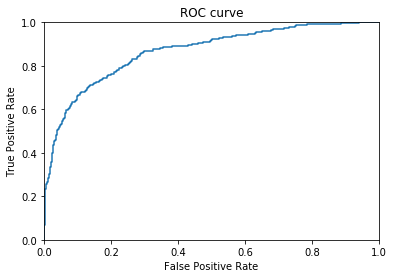

In [ ]:
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test )
plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show() 

In [ ]:
forest_test = forest.predict(features_test)
f1_score(target_test, forest_test)

0.6352941176470588

In [ ]:
probabilities_test = forest.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

roc_auc_score(target_test, probabilities_one_test)

0.8676792655928274

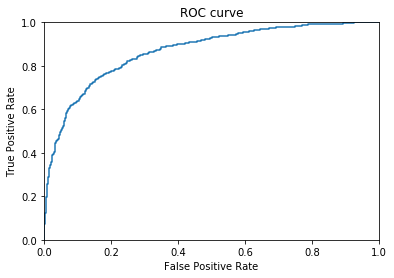

In [ ]:
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)
plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show() 

Проверка на вменяемость - сравним с константной моделью

In [ ]:
target_const = target.replace(target, 1)
f1_score(target, target_const)

0.3384564260197724

По предоставленным данным, 20 процентов клиентов покидают банк. Чтобы построить модель, которая предскажет - покинет клиент банк или нет, данные разделили на обучающие (60%), валидационные (20%) и тестовые (20%). Протестировали несколько моделей и на основании параметра f1 и roc_auc выбрали лучшую. Лучше всего себя показали модели слуйчайного леса и catboost. Эти модели показали f1, равное 0,63 - они преодолели заданный порог в f1 = 0,59. Обе модели прошли проверку на адекватность. 